In [1]:
import pandas as pd

In [3]:
# Ecom Expense.csv
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


# Metadata of Preceding table
•	Transaction ID: Transaction ID for the transaction  
•	Age: Age of the customer  
•	Items: Number of items in the shopping cart (purchased)  
•	Monthly Income: Monthly disposable income of the customer  
•	Transaction Time: Total time spent on the website during the transaction  
•	Record: How many times the customer has shopped with the website in the past  
•	Gender: Gender of the customer  
•	City Tier: Tier of the city    
•	Total Spend: Total amount spent in the transaction  
  

# Handling categorical variables

In [4]:
dummy_gender=pd.get_dummies(df['Gender'],prefix='Sex')
dummy_city_tier=pd.get_dummies(df['City Tier'],prefix='City')

In [8]:
[dummy_gender.head(), dummy_city_tier.head()]

[   Sex_Female  Sex_Male
 0           1         0
 1           1         0
 2           0         1
 3           1         0
 4           1         0,    City_Tier 1  City_Tier 2  City_Tier 3
 0            1            0            0
 1            0            1            0
 2            0            1            0
 3            1            0            0
 4            0            1            0]

# Attach these new variables to the main data frame

In [10]:
column_name=df.columns.values.tolist()
df1=df[column_name].join(dummy_gender)
column_name1=df1.columns.values.tolist()
df2=df1[column_name1].join(dummy_city_tier)
df2.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Sex_Female,Sex_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


# Assume a linear relationship between the output variable Total Spend and the predictor variables: Monthly Income and Transaction Time, and both set of dummy variables

In [13]:
from sklearn.linear_model import LinearRegression
feature_cols = ['Monthly Income','Transaction Time','City_Tier 1','City_Tier 2','City_Tier 3','Sex_Female','Sex_Male']
X = df2[feature_cols]
Y = df2['Total Spend']
lm = LinearRegression()
lm.fit(X,Y)
# The model parameters can be found out, as follows:
print (lm.intercept_)
print (lm.coef_)
list(zip(feature_cols, lm.coef_))

3655.72940769
[   0.15297825    0.12372609  119.6632516   -16.67901801 -102.9842336
  -94.15779883   94.15779883]


[('Monthly Income', 0.15297824609320515),
 ('Transaction Time', 0.12372608642620003),
 ('City_Tier 1', 119.66325160390119),
 ('City_Tier 2', -16.679018007990429),
 ('City_Tier 3', -102.98423359591075),
 ('Sex_Female', -94.157798830320132),
 ('Sex_Male', 94.157798830320075)]

Total_Spend=3655.72 + 0.12*Transaction Time + 0.15*Monthly Income + 119*City_Tier 1-16*City_Tier 2 - 102*City_Tier 3-94*Sex_Female+94*Sex_Male

### Preceding code are Coefficients of the model

# The R2 

In [14]:
lm.score(X,Y)

0.19478920552885381

# Adding Record variable

In [15]:
feature_cols = ['Monthly Income','Record','Transaction Time','City_Tier 1','City_Tier 2','City_Tier 3','Sex_Female','Sex_Male']
X = df2[feature_cols]
Y = df2['Total Spend']
lm1 = LinearRegression()
lm1.fit(X,Y)
# The model parameters can be found out, as follows:
print (lm1.intercept_)
print (lm1.coef_)
list(zip(feature_cols, lm1.coef_))

-79.4171303014
[  1.47538980e-01   7.72233446e+02   1.54946125e-01   7.67643260e+01
   5.51389743e+01  -1.31903300e+02  -1.31025013e+02   1.31025013e+02]


[('Monthly Income', 0.1475389804920573),
 ('Record', 772.23344574456473),
 ('Transaction Time', 0.15494612549593967),
 ('City_Tier 1', 76.764326010495424),
 ('City_Tier 2', 55.138974309232317),
 ('City_Tier 3', -131.9033003197278),
 ('Sex_Female', -131.0250132555463),
 ('Sex_Male', 131.02501325554636)]

# The R2 

In [16]:
lm1.score(X,Y)

0.91799235861310158

In [17]:
# RSE Calculation

In [18]:
import numpy as np
df2['total_spend_pred']=3720.72940769 + 0.12*df2['Transaction Time']+0.15*df2['Monthly Income']+119*df2['City_Tier 1']-16*df2['City_Tier 2']
-102*df2['City_Tier 3']-94*df2['Sex_Female']+94*df2['Sex_Male']
df2['RSE']=(df2['Total Spend']-df2['total_spend_pred'])**2
RSEd=df2.sum()['RSE']
RSE=np.sqrt(RSEd/2354)
salesmean=np.mean(df2['Total Spend'])
error=RSE/salesmean
RSE,salesmean,error

(2518.8520388731386, 6163.1764159767154, 0.40869380800840843)

# Transforming a variable to fit non-linear relations

In [24]:
# Auto.csv
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Text(0,0.5,'MPG (Miles Per Gallon)')

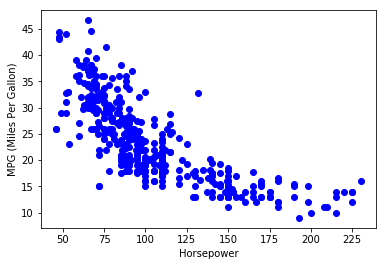

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
data['mpg']=data['mpg'].dropna()
data['horsepower']=data['horsepower'].dropna()
plt.plot(data['horsepower'],data['mpg'],'bo')
plt.xlabel('Horsepower')
plt.ylabel('MPG (Miles Per Gallon)')

# Assuming a linear relationship between mpg and square of horsepower

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
X=data['horsepower'].fillna(data['horsepower'].mean())
Y=data['mpg'].fillna(data['mpg'].mean())
lm=LinearRegression()
lm.fit(X[:,np.newaxis],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

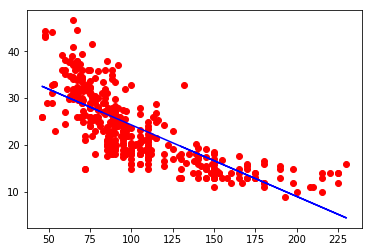

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data['horsepower'],data['mpg'],'ro')
plt.plot(X,lm.predict(X[:,np.newaxis]),color='blue')

## R2

In [34]:
lm1.score(X[:,np.newaxis],Y)

ValueError: shapes (406,1) and (8,) not aligned: 1 (dim 1) != 8 (dim 0)

# RSE

In [35]:
RSEd=(Y-lm.predict(X[:,np.newaxis]))**2
RSE=np.sqrt(np.sum(RSEd)/389)
ymean=np.mean(Y)
error=RSE/ymean
RSE,error

(5.1496254786975229, 0.21899719414044685)

### The value of RSE for this model comes out to be 5.15, which over a mean value of 21.89 gives an error of 21%.

# polynomial fits for same dataset

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X=data['horsepower'].fillna(data['horsepower'].mean())
Y=data['mpg'].fillna(data['mpg'].mean())
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X[:,np.newaxis])
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print (clf.intercept_)
print (clf.coef_)

list(zip(feature_cols, clf.coef_))

55.0261924471
[ 0.         -0.43404318  0.00112615]


[('Monthly Income', 0.0),
 ('Record', -0.43404317898366479),
 ('Transaction Time', 0.0011261468042638723)]

The model can be written as:
 
mpg = 55.02 - 0.43*horsepower+0.001*horsepower**2

# Handling outliers